# 住宅価格の分析

### １．ライブラリ読み込み

In [51]:
# ライブラリ読み込み
%matplotlib inline

import numpy as np

### ２．データセットの読み込み

In [52]:
# データセット読み込み
from sklearn import datasets
boston = datasets.load_boston()

### ３．データ内容の確認

In [53]:
# データ(辞書)のキー確認
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [54]:
# データ概要の確認
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

0. CRIM: 人口 1 人当たりの犯罪発生数    
1. ZN: 25,000 平方フィート以上の住居区画の占める割合
2. INDUS: 小売業以外の商業が占める面積の割合
3. CHAS: チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)
4. NOX: NOx の濃度
5. RM: 住居の平均部屋数
6. AGE: 1940 年より前に建てられた物件の割合
7. DIS: 5 つのボストン市の雇用施設からの距離 (重み付け済)
8. RAD: 環状高速道路へのアクセスしやすさ
9. TAX: $10,000 ドルあたりの不動産税率の総計
10. PTRATIO: 町毎の児童と教師の比率
11. B: 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2
12. LSTAT: 給与の低い職業に従事する人口の割合 (%)

In [55]:
# データをpandasデータフレームで表示
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target # 目的変数(target)追加
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
# 欠損の確認
col_names = boston_df.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(boston_df[col_name]))
    print(col_name, '; # of missing record: ', missing_num)

CRIM ; # of missing record:  0
ZN ; # of missing record:  0
INDUS ; # of missing record:  0
CHAS ; # of missing record:  0
NOX ; # of missing record:  0
RM ; # of missing record:  0
AGE ; # of missing record:  0
DIS ; # of missing record:  0
RAD ; # of missing record:  0
TAX ; # of missing record:  0
PTRATIO ; # of missing record:  0
B ; # of missing record:  0
LSTAT ; # of missing record:  0
PRICE ; # of missing record:  0


In [57]:
# 要約統計量の出力
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### ４．データを可視化

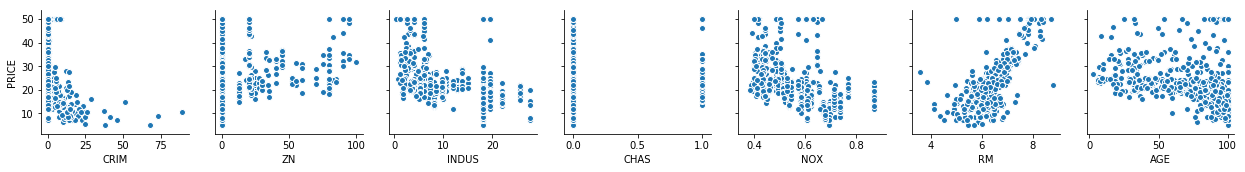

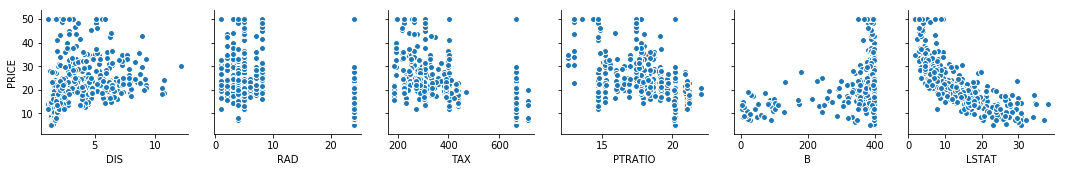

In [58]:
# 特徴x特徴の散布図行列で相関関係を確認、あたりをつける
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(boston_df, x_vars=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE"] , y_vars=["PRICE"])
sns.pairplot(boston_df, x_vars=["DIS","RAD","TAX","PTRATIO","B","LSTAT"] , y_vars=["PRICE"])
## 順相関>RM、逆相関>LSTAT、の２特徴量が最も相関が強そうである

### ５．特徴量の準備・選択

In [59]:
# 目的変数PRICE（価格）と説明変数RM（部屋数）、LSTAT（給与の低い職業に従事する人口の割合）を用意
X_RM, X_LSTAT = boston.data[:, [5]], boston.data[:, [12]]
# 特徴量作成：正の相関が強いRMを負の相関が強いLSTATで除する
X_RDL = boston.data[:, [5]]/(boston.data[:, [12]])
y_PRICE = boston.target

In [60]:
# 選定用に線形回帰モデルを作成
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lf_rm = linear_model.LinearRegression()
lf_lstat = linear_model.LinearRegression()
lf_rdl = linear_model.LinearRegression()
# モデルの学習
lf_rm.fit(X_RM, y_PRICE)
lf_lstat.fit(X_LSTAT, y_PRICE)
lf_rdl.fit(X_RDL, y_PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
# MSE（平均二乗誤差）で精度測定
from sklearn.metrics import mean_squared_error
y_pred = lf_rm.predict(X_RM)
mse = mean_squared_error(y_PRICE, y_pred)
print('MSE_rm = ', mse)
y_pred_l = lf_lstat.predict(X_LSTAT)
mse = mean_squared_error(y_PRICE, y_pred_l)
print('MSE_lstat = ', mse)
y_pred_rdl = lf_rdl.predict(X_RDL)
mse = mean_squared_error(y_PRICE, y_pred_rdl)
print('MSE_rdl = ', mse)

MSE_rm =  43.60055177116956
MSE_lstat =  38.48296722989414
MSE_rdl =  28.526801575607916


Text(0,0.5,'Price ($1000s)')

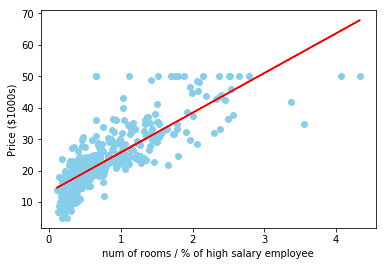

In [62]:
# 精度の良かった特徴量RDLでデータプロット
plt.scatter(X_RDL, y_PRICE, c = 'skyblue', alpha = 1.0)
# 回帰式の係数aと切片bを確認
a = lf_rdl.coef_ # 回帰式の係数
b = lf_rdl.intercept_ # 回帰式の切片
# モデルのプロット
y_pred = a * X_RDL + b
plt.plot(X_RDL, y_pred, 'red')
plt.xlabel('num of rooms / % of high salary employee')
plt.ylabel('Price ($1000s)')

In [63]:
# 選択した特徴量を追加
boston_df['RDL'] = X_RDL
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,RDL
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1.320281
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.702516
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.782878
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.380272
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.340901


### ６．学習・テストデータの準備

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [65]:
target_col = 'PRICE'
exclude_cols ='PRICE'
feature_cols = [col for col in boston_df.columns if col not in exclude_cols]

In [66]:
feature_cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'RDL']

In [67]:
y = np.array(boston_df[target_col])
X = np.array(boston_df[feature_cols])

In [68]:
# 学習・テスト用にデータを７：３に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

### ７．アルゴリズムの選択

#### 線形回帰モデル

In [69]:
lm = LinearRegression()
lm.fit(X_train1, y_train1)
y_pred2 = lm.predict(X_train2)
lm_mse = mean_squared_error(y_train2, y_pred2)
print('LinerRegression MSE: ', lm_mse)

LinerRegression MSE:  19.762995273365064


#### 回帰木モデル

In [70]:
dt = DecisionTreeRegressor()
dt.fit(X_train1, y_train1)
y_pred2 = dt.predict(X_train2)
dt_mse = mean_squared_error(y_train2, y_pred2)
print('DT MSE: ', dt_mse)

DT MSE:  17.011588785046726


#### ランダムフォレストモデル

In [71]:
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1, y_train1)
y_pred2 = rf.predict(X_train2)
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest MSE: ', rf_mse)

RandomForest MSE:  10.758353271028039


#### クロスバリデーション

In [72]:
rf = RandomForestRegressor(random_state=1234)
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]}

In [73]:
gscv = GridSearchCV(rf, param_grid=params, verbose=1, cv=3, scoring='mean_squared_error')

### <質問１>▽の第一引数には、X_train1内のX_RDLを抽出したようなものを入れるべきなのかな思うのですがどのようにすればよいのでしょうか？

In [74]:
#gscv.fit(X_train1[:, selected_feature_index], y_train1)
gscv

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=1)

In [75]:
gscv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

### ８．モデルの学習・精度確認

### <質問２>質問１同様に、学習fitのarg1にX_train1['RDL']、予測prefictのargにX_test['RDL']を入れようと考えています。ご指摘ありましたらお願いいたします。

In [76]:
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1, y_train1)
y_pred_test = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_test)
print('RandomForest MSE: ', rf_mse)

RandomForest MSE:  14.872353289473686


### ９．誤差の様子を可視化して確認

#### 予測数値と実際の値の散布図

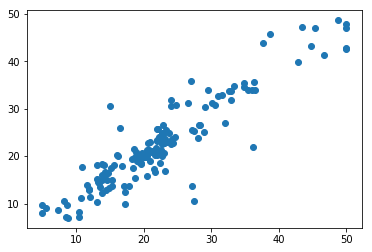

In [77]:
plt.scatter(y_test, y_pred_test)